# Final project raw code 

I looked at your README and commented, hopefully that got transfered.
Wind direction plot?
Really nice function for plotting.Line graph rather than scatter plot??
Looks like you're well on your way.
Finding the averages of your values could be really useful.

Once you find what kind of statistical test shows whether there is a relationship, you can set up functions that create the situation for your simulator. Ie Create an if than statement for if there is a statistical significance, put the variable info in this file, if there isn't, put it in a different file.

In [188]:
#import the python library 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import random

#versions of 

#stats lybraries
import statsmodels.api as sm 
import scipy

#here i set limits on what i allow the phyton to show in tables
from pandas import set_option
set_option('display.max_rows',8) 
#limits rows show in tablle by 10(above). change this number if you want more or less rows visible

In [189]:
#random colors 
r = lambda: random.randint(0,255)
#put this code in for colors= '#%02X%02X%02X' % (r(),r(),r()))

## Data import and setting of the colunms names 

In [190]:
#import weather data to python. 
weather_data_quest = pd.read_csv('..//data/QuestU_Remote_Weather_Station_oct312015.csv',)

#assigning columns names 
weather_data_quest.columns=[['num_test','Date_Time','Rainfall','temperature','relative_humidity','wind_direction','wind_speed','gust_speed']]

# making my my index veiwed as a date time subject not a string. 
weather_data_quest['Date_Time'] = pd.to_datetime(weather_data_quest['Date_Time'])

#show what the table of weather_data_quest looks like. 
weather_data_quest

num_test           Date_Time  Rainfall  temperature  relative_humidity  \
0            1 2015-09-23 09:04:59       NaN       12.243               84.6   
1            2 2015-09-23 09:19:59       0.0       12.316               84.4   
2            3 2015-09-23 09:34:59       0.0       12.340               84.7   
3            4 2015-09-23 09:49:59       0.0       12.074               84.6   
...        ...                 ...       ...          ...                ...   
3665      3666 2015-10-31 13:19:59       0.2       12.654               94.5   
3666      3667 2015-10-31 13:34:59       0.0       12.122               97.9   
3667      3668 2015-10-31 13:49:59       0.2       11.880               98.2   
3668      3669 2015-10-31 14:04:59       0.4       11.734               98.1   

      wind_direction  wind_speed  gust_speed  
0               64.6        0.76        6.30  
1               92.7        0.00        0.76  
2                1.4        0.00        1.51  
3                7.0        0.00        1.26  
...              ...         ...         ...  
3665            99.7        0.00        1.51  
3666           233.1        0.00        1.76  
3667           203.6        0.00        2.52  
3668           140.4        0.00        0.50  

[3669 rows x 8 columns]

In [191]:
# i wanted to see the type of data i was working with. 
weather_data_quest.dtypes

num_test                      int64
Date_Time            datetime64[ns]
Rainfall                    float64
temperature                 float64
relative_humidity           float64
wind_direction              float64
wind_speed                  float64
gust_speed                  float64
dtype: object

## research question and hypothesis 

This project will be determining the interconnectivity of weather variables in search of answering the question: What are the correlations and relationships between weather variables?

I hypothesize that the variables will have clear relationships between one another. This means that if one variable increases or decreases the other variable will react in a predictable manner.




## Visualizing The wind speed and Gust speed relationship.  

The relationship between wind speed and gust speed is not one that will answer my question for my final project. it was simply created for me to figure out what steps were needed to profrom test between variables. the work the will help me for my final project will be found after the gust and wind speed group. 


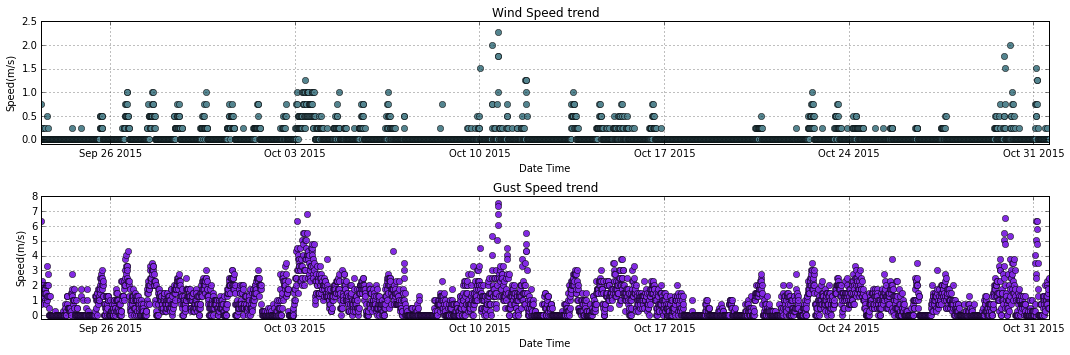

In [192]:
plt.figure(figsize=(15,5))

# define subplot 1 
plt.subplot(2,1,1)
plt.plot(weather_data_quest['Date_Time'] ,weather_data_quest['wind_speed'], marker='o', color='#%02X%02X%02X' % (r(),r(),r()), linestyle='')

#add title
plt.title('Wind Speed trend')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Date Time')

#modify x axis limits

plt.xlim()
plt.ylim(-.1,)


# define subplot 2
plt.subplot(2,1,2)
plt.plot(weather_data_quest['Date_Time'], weather_data_quest['gust_speed'], marker='o', color='#%02X%02X%02X' % (r(),r(),r()),linestyle='' )

#add title
plt.title('Gust Speed trend')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Date Time')

#modify x axis limits

plt.xlim()
plt.ylim(-.25,)

#gice plots some breathing room
plt.tight_layout()

#show plot 
plt.show()

The graphs above are showing the plot values of speed for both gust and wind over date and time its was measured. I created this graph to begin understanding the relationship between wind and gust speeds. from looking at the above graphs i see that they seem to hit there maximums around the same time.  

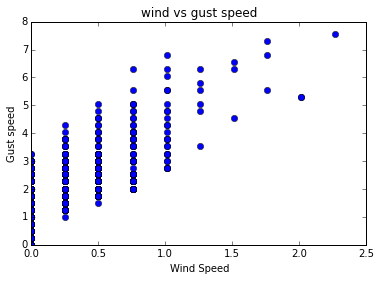

In [193]:
# here is a graph that shows wind speed vs gust speed. 
plt.plot(weather_data_quest['wind_speed'], weather_data_quest['gust_speed'], linestyle='' , marker='o')

#adding labels to the graph 
plt.xlabel('Wind Speed')
plt.ylabel('Gust speed')
plt.title('wind vs gust speed')

#showing the graph. 
plt.show()

this graph is plot of wind and gust speed ploted agaist eachother. 

## Statistical analysis of wind and gust speed relationship. 


What is the relationship between gust speed and wind speed? is it linar? 

In [194]:
lm = sm.formula.ols(formula='gust_speed~wind_speed', data= weather_data_quest ).fit()
lm.params

Intercept     0.696602
wind_speed    3.745481
dtype: float64

In [195]:
#createing x values to help create y values for my line of best fit. 
x = pd.DataFrame({'wind_speed': range(0,3)})
x 

wind_speed
0           0
1           1
2           2

In [196]:
# creating y values for my line of best fit. 
y = lm.predict(x)

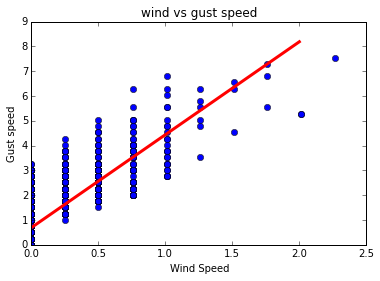

In [197]:
#plotting my line of best fit. on the graph it was created for. 
plt.plot(weather_data_quest['wind_speed'], weather_data_quest['gust_speed'], linestyle='' , marker='o')

plt.xlabel('Wind Speed')
plt.ylabel('Gust speed')
plt.title('wind vs gust speed')

plt.plot(x, y, color='red', linewidth=3)

plt.show()

In [198]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:             gust_speed   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4319.
Date:                Wed, 18 Nov 2015   Prob (F-statistic):               0.00
Time:                        10:02:52   Log-Likelihood:                -3813.0
No. Observations:                3669   AIC:                             7630.
Df Residuals:                    3667   BIC:                             7642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6966      0.012     57.967      0.0

## Visualizing The relationship of Temperature and other variables.

In [199]:
#this funtion will plot variables vs date time. 
#two graphs will be created a standard temp date time graph and graph of any other vairable in my dataframe
def visulizing_temp(data, title, label_y):

    plt.figure(figsize=(15,5))

    #plot one temperature plot
    plt.subplot(2,1,1)
    plt.plot(weather_data_quest['Date_Time'], weather_data_quest['temperature'], marker='o', color='m', linestyle='')
    
    #add title
    plt.title( "Temperature")

    #add gridlines
    plt.grid(True)

    #add axis lables 
    plt.ylabel ("Temperature(C)")
    plt.xlabel ('Date Time')
 
    #plot any variable in data frame
    plt.subplot(2,1,2)
    plt.plot(weather_data_quest['Date_Time'], data, marker='o', color='#%02X%02X%02X'%(r(),r(),r()), linestyle='')

    #add title
    plt.title( title)

    #add gridlines
    plt.grid(True)

    #add axis lables 
    plt.ylabel (label_y)
    plt.xlabel ('Date Time')
    
    plt.show()


I decide to create the tempurature graph every time so it is easy to see compare the other graph to it. 
i found the side by side nicer then scrolling up and down. 

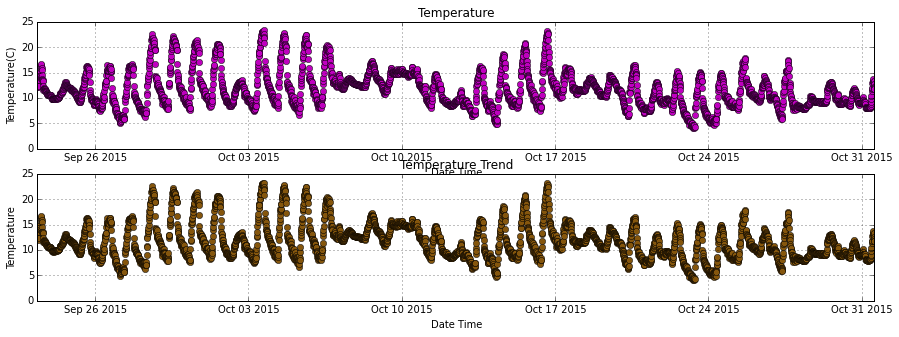

In [200]:
visulizing_temp(weather_data_quest['temperature'], 'Temperature Trend', 'Temperature')

above graph is just to make sure my function works.

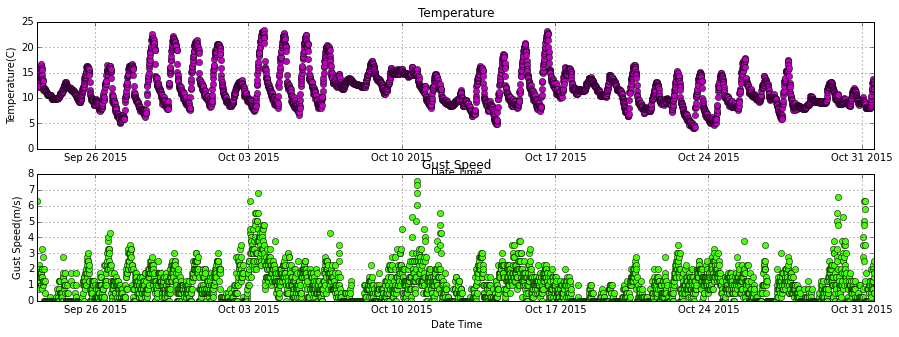

In [201]:
visulizing_temp(weather_data_quest['gust_speed'], 'Gust Speed', 'Gust Speed(m/s)')

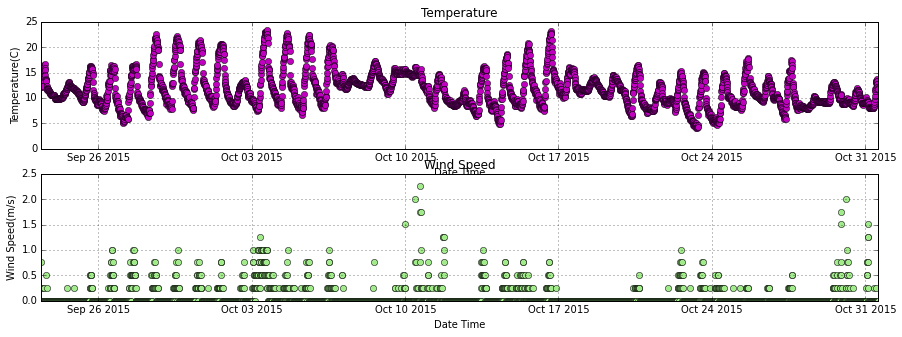

In [202]:
visulizing_temp(weather_data_quest['wind_speed'], 'Wind Speed', "Wind Speed(m/s)")

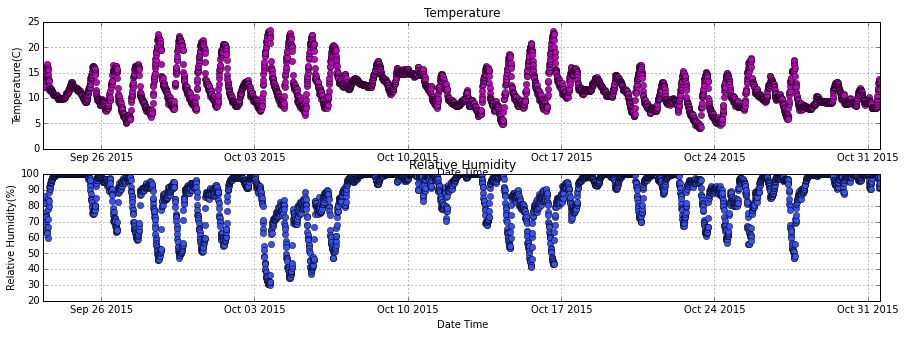

In [203]:
visulizing_temp(weather_data_quest['relative_humidity'], 'Relative Humidity', "Relative Humidity(%)")

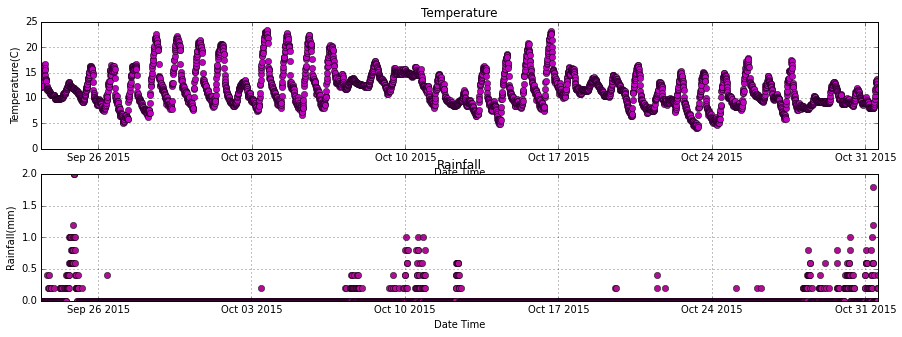

In [204]:
visulizing_temp(weather_data_quest['Rainfall'], 'Rainfall', 'Rainfall(mm)')

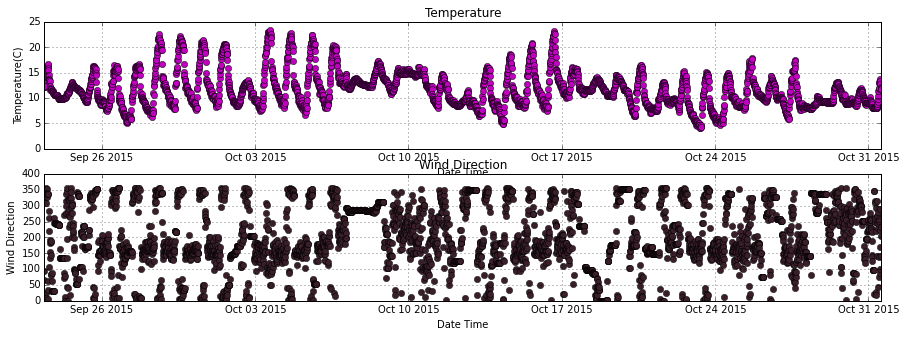

In [205]:
visulizing_temp(weather_data_quest['wind_direction'], 'Wind Direction', 'Wind Direction')

#variables vs. temperature


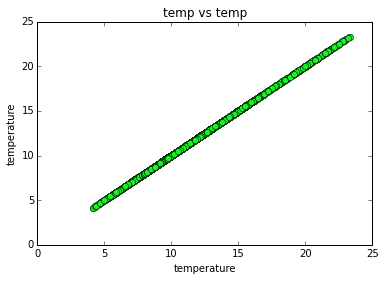

In [206]:
plt.plot(weather_data_quest['temperature'], weather_data_quest['temperature'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('temperature')
plt.title('temp vs temp')

##This example of perfect distrubution. 

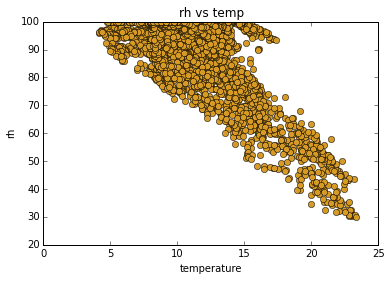

In [207]:
#plotting my line of best fit. on the graph it was created for. 
plt.plot(weather_data_quest['temperature'], weather_data_quest['relative_humidity'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('rh')
plt.title('rh vs temp')



plt.show()

In [208]:
lm_s = sm.formula.ols(formula='relative_humidity ~ temperature', data= weather_data_quest ).fit()
lm_s.params

Intercept      123.807550
temperature     -3.094788
dtype: float64

In [209]:
#createing x values to help create y values for my line of best fit. 
x_2 = pd.DataFrame({'temperature': range(5,25)})
x_2 


temperature
0             5
1             6
2             7
3             8
..          ...
16           21
17           22
18           23
19           24

[20 rows x 1 columns]

In [210]:
# creating y values for my line of best fit. 
y_2 = lm_s.predict(x_2)

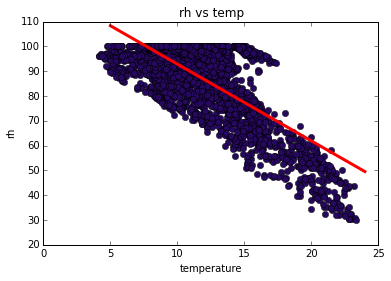

In [211]:
#plotting my line of best fit. on the graph it was created for. 
plt.plot(weather_data_quest['temperature'], weather_data_quest['relative_humidity'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('rh')
plt.title('rh vs temp')

plt.plot(x_2, y_2, color='red', linewidth=3)

plt.show()


In [212]:
print (lm_s.summary())

                            OLS Regression Results                            
Dep. Variable:      relative_humidity   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     4194.
Date:                Wed, 18 Nov 2015   Prob (F-statistic):               0.00
Time:                        10:02:55   Log-Likelihood:                -13728.
No. Observations:                3669   AIC:                         2.746e+04
Df Residuals:                    3667   BIC:                         2.747e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     123.8075      0.582    212.835      

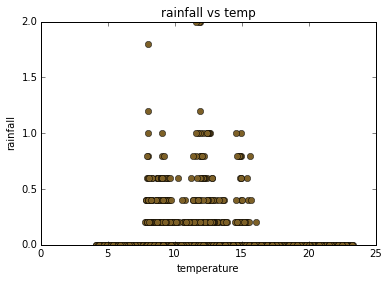

In [213]:

plt.plot(weather_data_quest['temperature'], weather_data_quest['Rainfall'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('rainfall')
plt.title('rainfall vs temp')

plt.show()

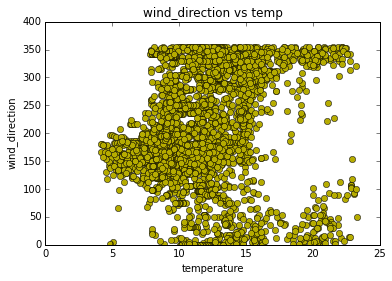

In [214]:

plt.plot(weather_data_quest['temperature'], weather_data_quest['wind_direction'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('wind_direction')
plt.title('wind_direction vs temp')

plt.show()

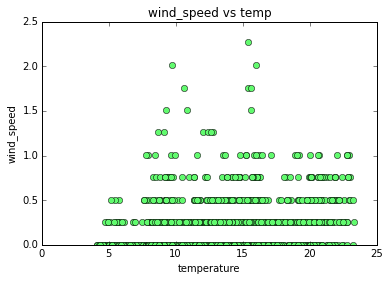

In [215]:

plt.plot(weather_data_quest['temperature'], weather_data_quest['wind_speed'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('wind_speed')
plt.title('wind_speed vs temp')

plt.show()

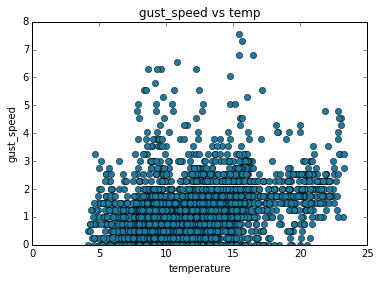

In [216]:

plt.plot(weather_data_quest['temperature'], weather_data_quest['gust_speed'], linestyle='' , marker='o', color='#%02X%02X%02X' % (r(),r(),r()))

plt.xlabel('temperature')
plt.ylabel('gust_speed')
plt.title('gust_speed vs temp')

plt.show()

##Statistical analysis of The relationship between Temperature and other variables.

In [217]:
def spearman_test(stat_data, x_value,  ):
    
    #run test
    answer =scipy.stats.spearmanr(x_value , stat_data) 
    pvalue = answer[1]
    rho = answer[0]
    return pvalue, rho
    


In [218]:
a = spearman_test(weather_data_quest['Rainfall'], weather_data_quest['temperature'])
b = spearman_test(weather_data_quest['temperature'], weather_data_quest['relative_humidity'])
c = spearman_test(weather_data_quest['temperature'], weather_data_quest['gust_speed'])
d = spearman_test(weather_data_quest['temperature'], weather_data_quest['wind_speed'])
e = spearman_test(weather_data_quest['temperature'], weather_data_quest['wind_direction'])
f = spearman_test(weather_data_quest['temperature'], weather_data_quest['temperature']) 

In [219]:
stats_dataframe = pd.DataFrame({'formula':['Temperature vs Rainfall' ,'Temperature vs Relative Humidity', 'Temperature vs Gust Speed', 'Temperature vs Wind Speed','Temperature vs Wind Direction','Temperature vs Temperature'], 'pvalue':[a[0], b[0], c[0],d[0], e[0],f[0]], 'rho':[a[1],b[1], c[1],d[1],e[1],f[1]]})

In [220]:
stats_dataframe

formula         pvalue       rho
0           Temperature vs Rainfall   7.559444e-03 -0.044092
1  Temperature vs Relative Humidity  2.399354e-212 -0.481530
2         Temperature vs Gust Speed   2.298413e-87  0.318643
3         Temperature vs Wind Speed  1.470581e-118  0.368756
4     Temperature vs Wind Direction   2.642045e-47  0.235224
5        Temperature vs Temperature   0.000000e+00  1.000000

## The Resuslts 
 
 From analzing the calaculated data. The null hypothesis for the spearman's test may be rejected and which means correlation is possible between my varaibles. This outcome did not answer my research quetion but its does mean that further reasearch can be done to dettermin an asnwer. 